<h1 style="font-size: 38px; text-align: center; color: blue">The implementation of deep learning to develop an adequate tool for identifying the bumblebee species in Ireland</h1>

<br> </br>

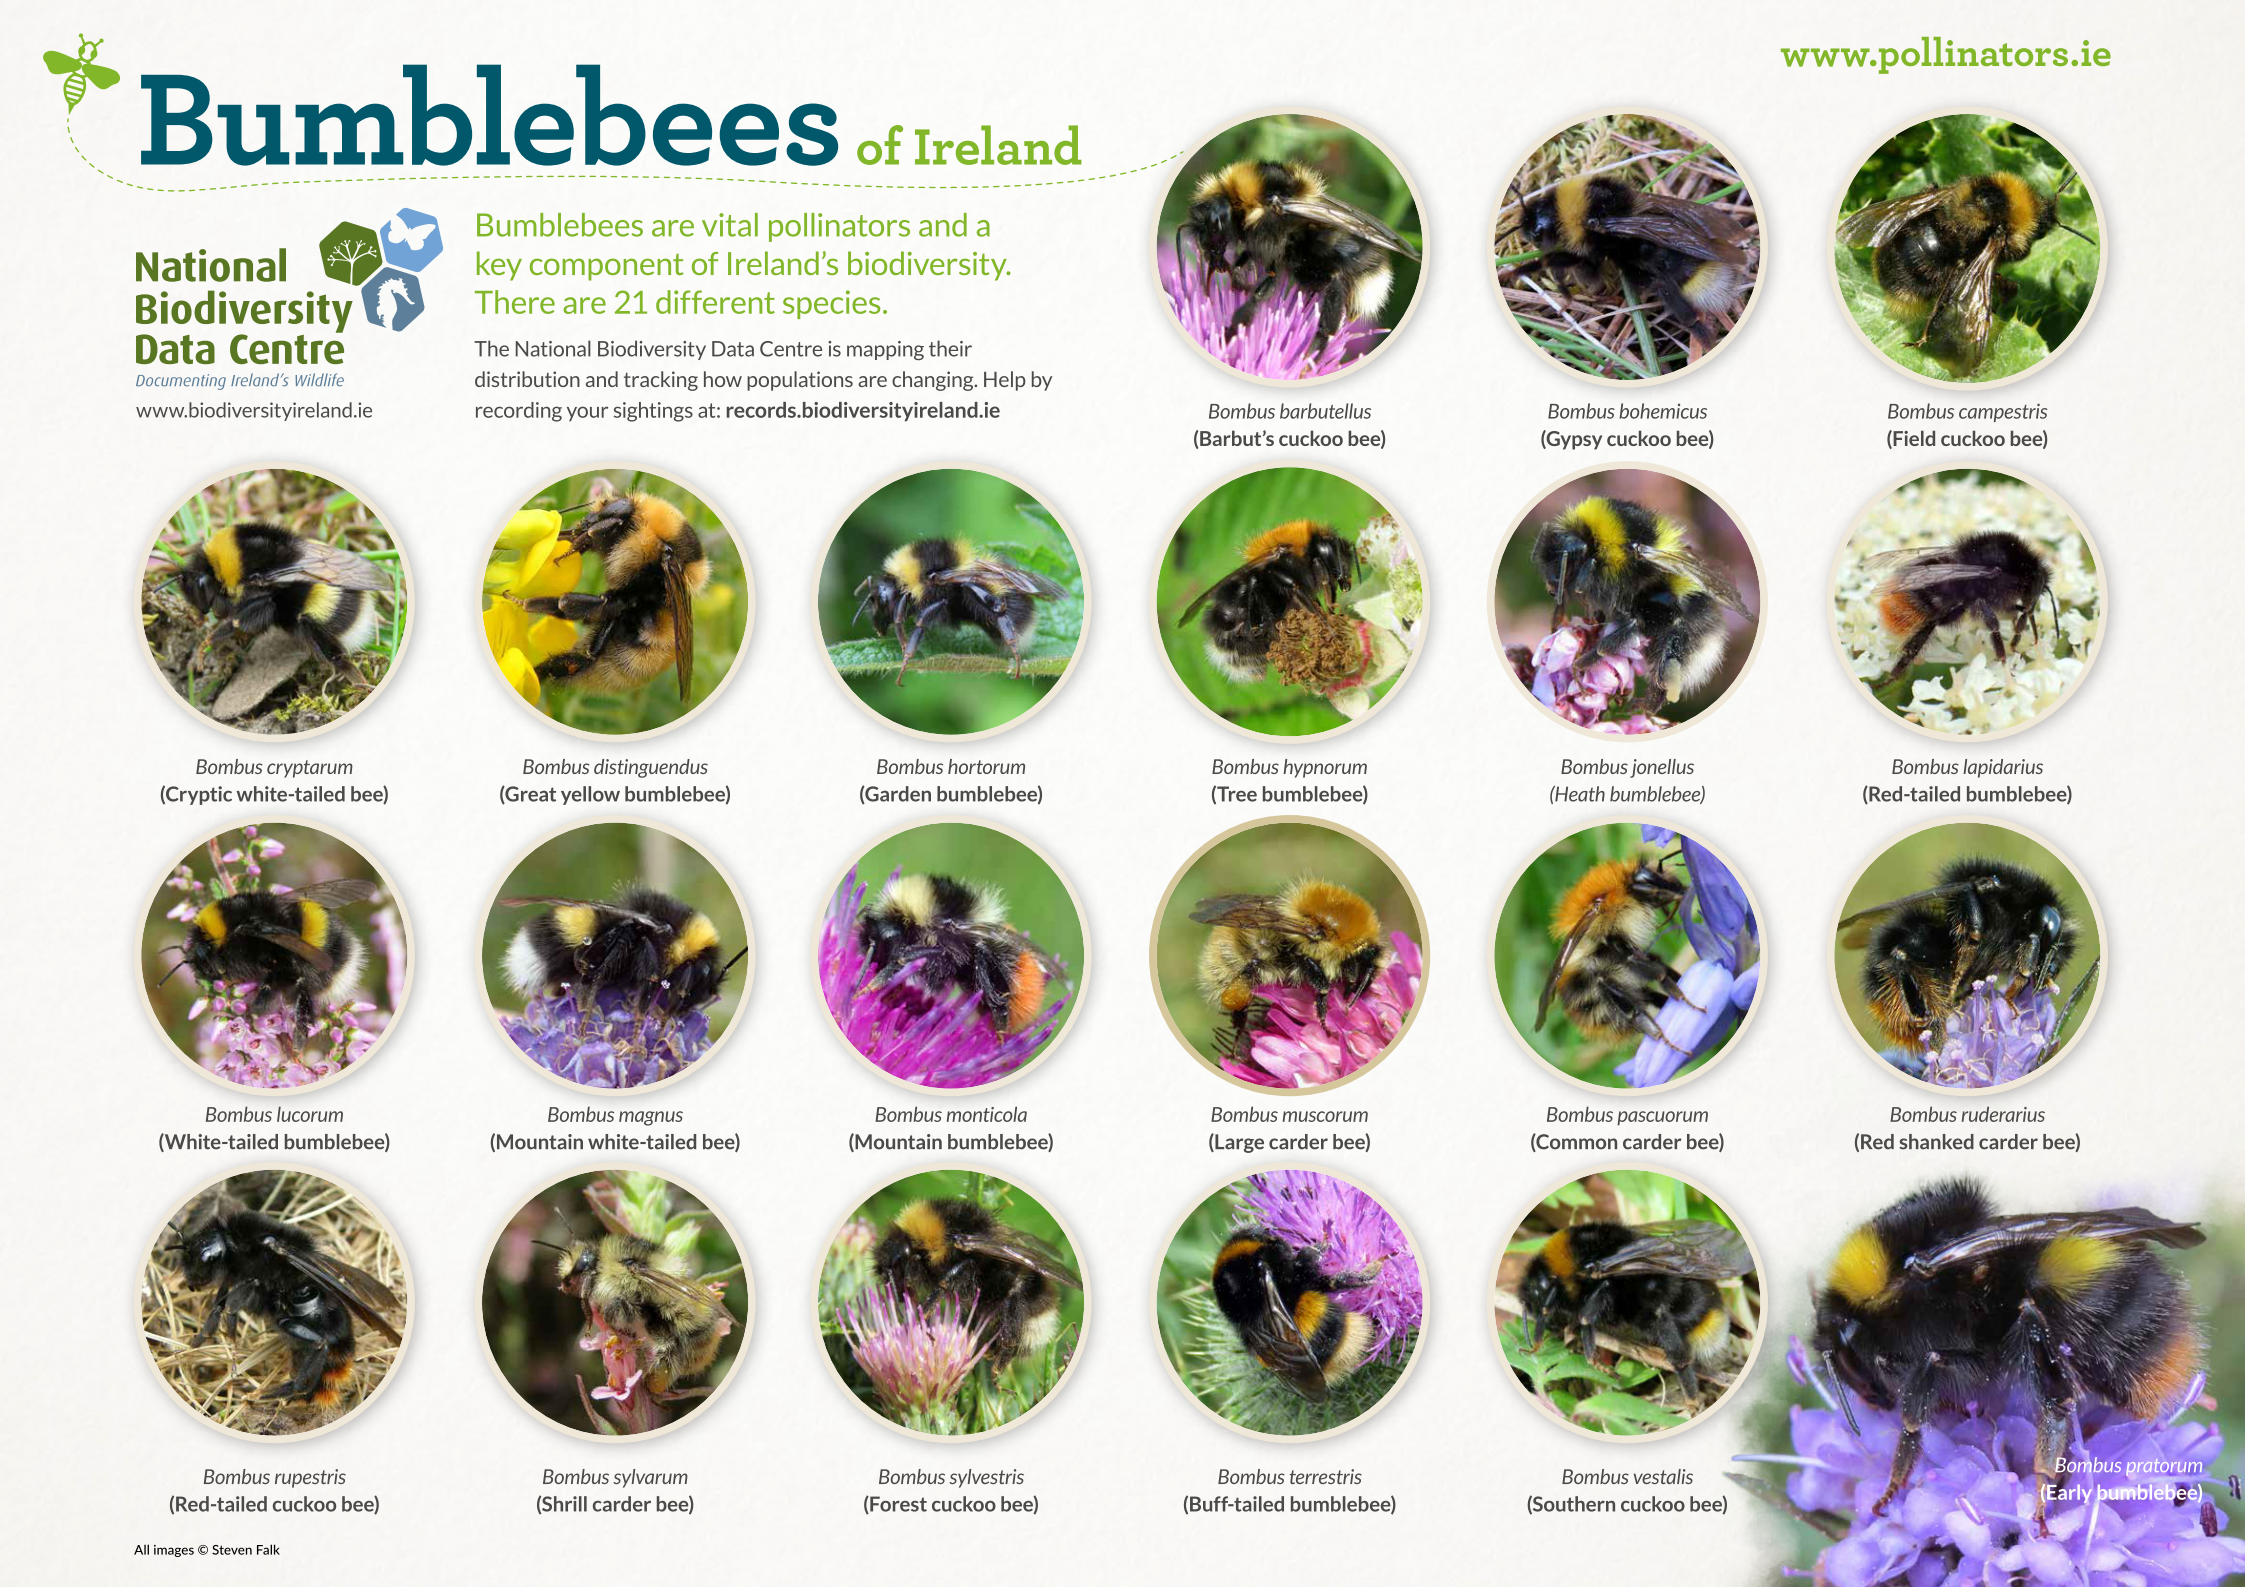

<br> </br>

<h1 style="font-size: 28px; text-align: center; color: green"> 1. Data Preparation </h1>

<br> </br>

In [1]:
# Import libraries
import os
import shutil
import random
import xml.etree.ElementTree as ET
import cv2

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Split the data into two parts, one for training and validating, one for testing

# # Set the path to the root of the data
# image_dir = '/home/hduser/Desktop/final dataset testing'

# # Set the percentage for the training and validating
# # the rest is for testing
# train_percentage = 0.9

# # Create directories for training and testing sets
# train_dir = os.path.join(image_dir, 'train')
# test_dir = os.path.join(image_dir, 'test')
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Create the bumblebee species list
species_list = [
    'barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus',
    'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum',
    'magnus', 'monticola', 'muscorum', 'pascuorum', 'pratorum',
    'ruderarius', 'rupestris', 'sylvarum', 'sylvestris', 'terrestris', 'vestalis'
]

# # Set random seed so that the research is replicable
# random.seed(42)

# # Iterate through each species and copy related images to the train and test folders
# for species in species_list:
#     # Get all images for the 21 bumblebee species
#     species_images = [file for file in os.listdir(image_dir) if species in file]
    
#     # Calculate the number of images for training
#     num_train = int(len(species_images) * train_percentage)
    
#     # Randomly shuffle the list of images
#     random.shuffle(species_images)
    
#     # Split the images into training and testing sets
#     train_images = species_images[:num_train]
#     test_images = species_images[num_train:]
    
#     # Copy images to the corresponding directories
#     for image in train_images:
#         src_path = os.path.join(image_dir, image)
#         dest_path = os.path.join(train_dir, image)
#         shutil.copy(src_path, dest_path)
        
#     for image in test_images:
#         src_path = os.path.join(image_dir, image)
#         dest_path = os.path.join(test_dir, image)
#         shutil.copy(src_path, dest_path)

<br> </br>
<div style="text-align: justify;">
<h1 style="font-size: 18px"> All the images in the <i>train folder</i> were then uploaded onto CVAT (an open-source annotation tool) for annotating. A corresponding annotation file (.xml) was generated after. </h1>
</div>
<br> </br>

In [3]:
# # Transfer the original training images into annotated version (region of interest (ROI))

# # Read the annotation file
# os.chdir('/home/hduser/Desktop/final dataset testing/train')
# xml_file = 'bombus annotations.xml'
# tree = ET.parse(xml_file)
# root = tree.getroot()

# # Create a list to store the annotation details
# annotations = []

# # Extract mandatory info from the annotion and store in the list above
# # Iterate through each 'image' element in the XML
# for image in root.findall('image'):
#     image_id = int(image.get('id'))
#     image_name = image.get('name')
    
#     # For each 'box' element, extract bounding box coordinates
#     for box in image.findall('box'):
#         label = box.get('label')
#         xtl = float(box.get('xtl'))
#         ytl = float(box.get('ytl'))
#         xbr = float(box.get('xbr'))
#         ybr = float(box.get('ybr'))
        
#         annotations.append({
#             'image_id': image_id,
#             'image_name': image_name,
#             'label': label,
#             'xtl': xtl,
#             'ytl': ytl,
#             'xbr': xbr,
#             'ybr': ybr
#         })

# print(annotations) # Check the information

In [4]:
# # Extract ROI and convert all the images in train folder
# for annotation in annotations:
#     image = annotation['image_name']
#     xtl = int(annotation['xtl'])
#     ytl = int(annotation['ytl'])
#     xbr = int(annotation['xbr'])
#     ybr = int(annotation['ybr'])

#     image = cv2.imread(image)
#     roi_bombus = image[ytl:ybr, xtl:xbr]    
#     bombus = f"{annotation['image_name']}"
#     cv2.imwrite(bombus, roi_bombus)

In [5]:
## Split the processed train images into two parts, one for training, one for validating

# # Path to the directory containing processed train images
# input_directory = '/home/hduser/Desktop/final dataset testing/train'

# # Path to the directory for deep learning later
# output_directory = '/home/hduser/Desktop/final dataset testing/machine learning'

# # Create folders for train and validate sets
# train_directory = os.path.join(output_directory, 'train')
# validate_directory = os.path.join(output_directory, 'validate')
# os.makedirs(train_directory, exist_ok=True)
# os.makedirs(validate_directory, exist_ok=True)

# # Define the percentage for training set, hence 20% for validating
# training_percentage = 0.8

# # Set random seed so that the research is replicable
# random.seed(42)

# # Create folders for each species in train and validate sets
# for species in species_list:
#     species_train_folder = os.path.join(train_directory, f'bombus {species}')
#     species_validate_folder = os.path.join(validate_directory, f'bombus {species}')
#     os.makedirs(species_train_folder, exist_ok=True)
#     os.makedirs(species_validate_folder, exist_ok=True)

#     # List all the images for the species
#     species_images = [filename for filename in os.listdir(input_directory) if f'bombus {species}' in filename]

#     # Shuffle the images randomly
#     random.shuffle(species_images)

#     # Calculate the split point based on previously defined training percentage
#     split_point = int(len(species_images) * training_percentage)

#     # Move images to their respective folders
#     for i, filename in enumerate(species_images):
#         source_path = os.path.join(input_directory, filename)

#         if i < split_point:
#             destination_path = os.path.join(species_train_folder, filename)
#         else:
#             destination_path = os.path.join(species_validate_folder, filename)

#         shutil.move(source_path, destination_path)

In [6]:
# # Organising the test folder

# # Path to the directory containing test images
# test_directory = '/home/hduser/Desktop/final dataset testing/test'

# # Create species folders
# for species in species_list:
#     species_folder = os.path.join(test_directory, f'bombus {species}')
#     os.makedirs(species_folder, exist_ok=True)

# # Move testing images to corresponding species folders
# for filename in os.listdir(test_directory):
#     for species in species_list:
#         if species in filename.lower():
#             source_path = os.path.join(test_directory, filename)
#             destination_folder = os.path.join(test_directory, f'bombus {species}')
#             destination_path = os.path.join(destination_folder, filename)  # Include the filename here

#             # Check if the current item is a file before attempting to move it
#             if os.path.isfile(source_path):
#                 # Create the destination folder if it doesn't exist
#                 os.makedirs(destination_folder, exist_ok=True)

#                 shutil.move(source_path, destination_path)
#             break

<br> </br>

<h1 style="font-size: 28px; text-align: center; color: green"> 2. Model Training </h1>

<br> </br>

In [46]:
# Import libraries
import pathlib
import itertools
import glob
import numpy as np

import PIL

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Resizing, Rescaling, Activation, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [8]:
# Set data directory for training, validating and testing
training_data_dir = pathlib.Path('/home/hduser/Desktop/final dataset testing/machine learning/train/')
validate_data_dir = pathlib.Path('/home/hduser/Desktop/final dataset testing/machine learning/validate/')
test_data_dir = pathlib.Path('/home/hduser/Desktop/final dataset testing/test')

print(training_data_dir)
print(validate_data_dir)
print(test_data_dir)

/home/hduser/Desktop/final dataset testing/machine learning/train
/home/hduser/Desktop/final dataset testing/machine learning/validate
/home/hduser/Desktop/final dataset testing/test


<br> </br>
- **Check the image in the train folder**

In [9]:
bombus_barbutellus = list(training_data_dir.glob('bombus barbutellus/*'))
len(bombus_barbutellus)

144

/home/hduser/Desktop/final dataset testing/machine learning/train/bombus barbutellus/bombus barbutellus inaturalist 13.8.jpg


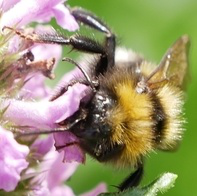

In [10]:
print(bombus_barbutellus[20])
PIL.Image.open(str(bombus_barbutellus[20]))

<br> </br>
## 2.1 Deep learning using tensorflow and keras
<br> </br>

### 2.1.1. InceptionV3

In [11]:
# Specify image size and batch size
img_height_incep, img_width_incep = (299, 299)
batch_size = 32

In [13]:
train_batches_incep = ImageDataGenerator(preprocessing_function=
                                         tf.keras.applications.inception_v3.preprocess_input) \
                    .flow_from_directory(training_data_dir, target_size=(img_height_incep, img_width_incep),
                                         batch_size=batch_size, class_mode='categorical', 
                                         shuffle=True)

Found 3024 images belonging to 21 classes.


In [14]:
validate_batches_incep = ImageDataGenerator(preprocessing_function=
                                            tf.keras.applications.inception_v3.preprocess_input) \
                    .flow_from_directory(validate_data_dir, target_size=(img_height_incep, img_width_incep),
                                         batch_size=batch_size, class_mode='categorical', 
                                         shuffle=True)

Found 756 images belonging to 21 classes.


In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 6, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

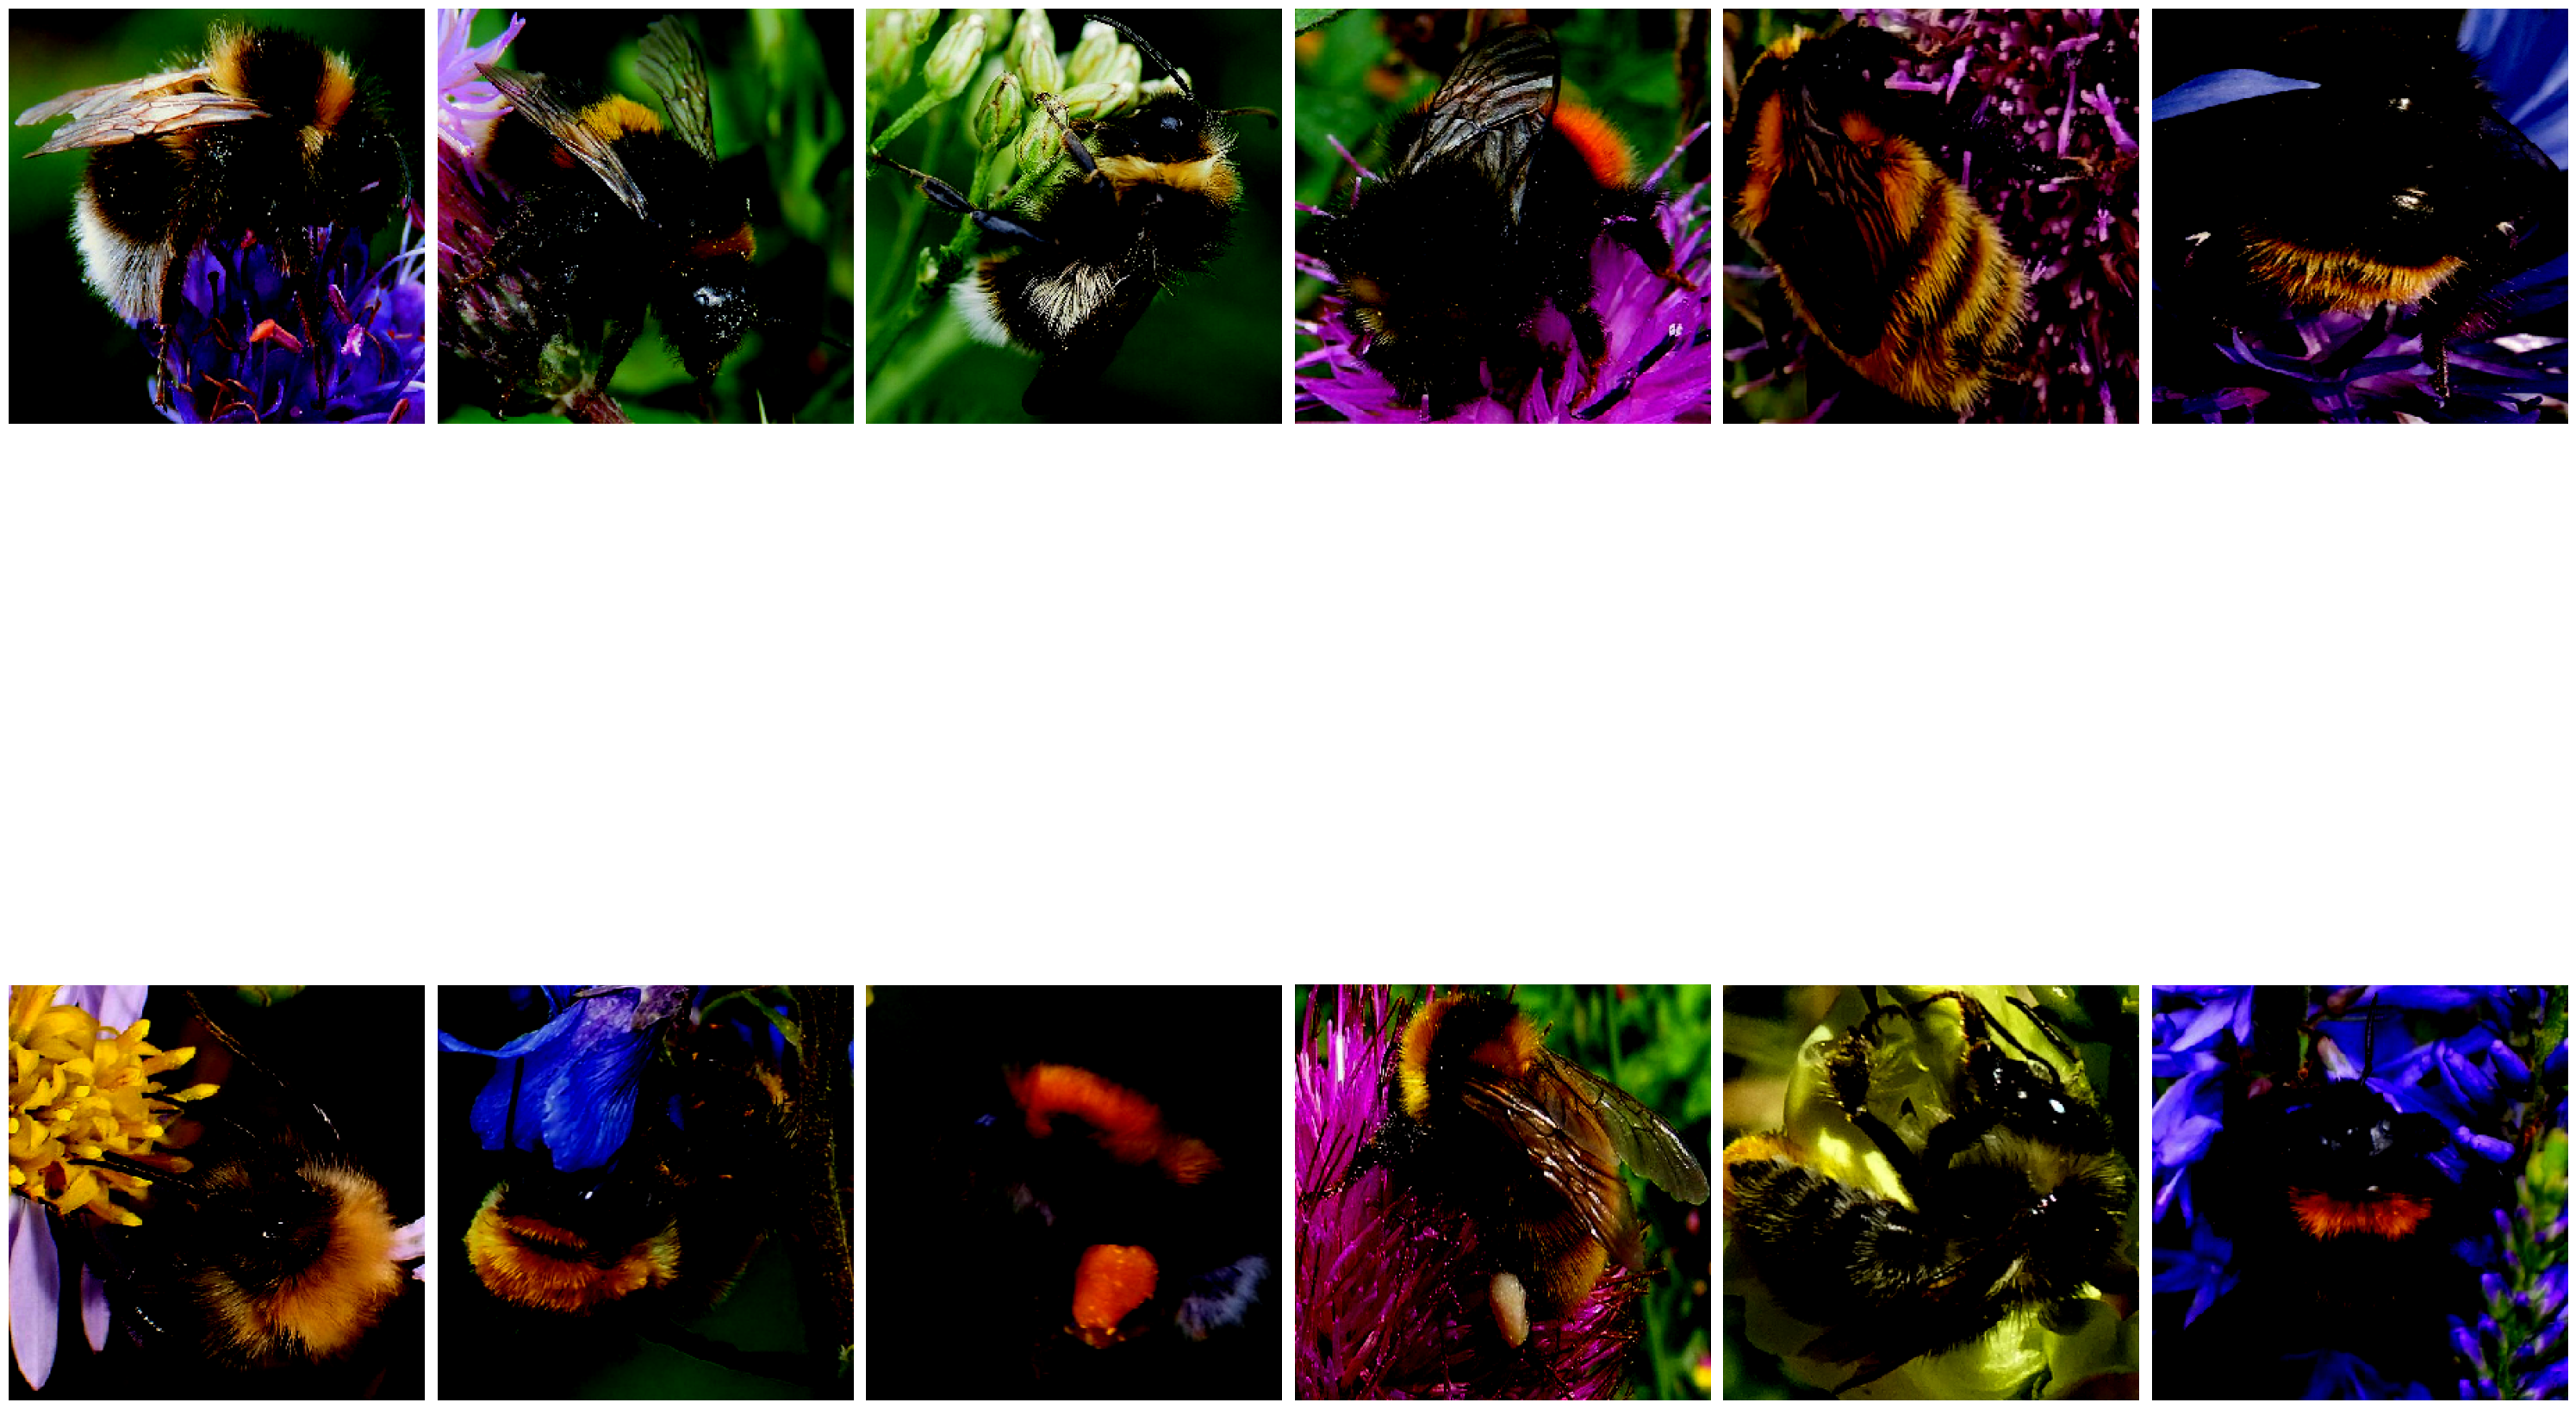

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [16]:
imgs, labels = next(train_batches_incep)

plotImages(imgs)
print(labels)

In [19]:
inceptionv3 = tf.keras.applications.InceptionV3(
    include_top=False,
    input_shape=(299, 299, 3),
    pooling='avg',
    weights='imagenet')

for layer in inceptionv3.layers:
        layer.trainable=False

In [20]:
inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 149, 149, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 149, 149, 32)         0         ['batch_normalizati

                                                                                                  
 conv2d_105 (Conv2D)         (None, 35, 35, 32)           6144      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 batch_normalization_99 (Ba  (None, 35, 35, 64)           192       ['conv2d_99[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_101 (B  (None, 35, 35, 64)           192       ['conv2d_101[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_104 (B  (None, 35, 35, 96)           288       ['conv2d_104[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_111 (Activation  (None, 35, 35, 96)           0         ['batch_normalization_111[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_112 (Activation  (None, 35, 35, 64)           0         ['batch_normalization_112[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 35, 35, 288)          0         ['activation_106[0][0]',      
                                                                     'activation_108[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_122 (Conv2D)         (None, 35, 35, 96)           55296     ['activation_121[0][0]']      
                                                                                                  
 batch_normalization_122 (B  (None, 35, 35, 96)           288       ['conv2d_122[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_122 (Activation  (None, 35, 35, 96)           0         ['batch_normalization_122[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_12

                                                                                                  
 conv2d_124 (Conv2D)         (None, 17, 17, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_127 (Conv2D)         (None, 17, 17, 192)          172032    ['activation_126[0][0]']      
                                                                                                  
 conv2d_132 (Conv2D)         (None, 17, 17, 192)          172032    ['activation_131[0][0]']      
                                                                                                  
 conv2d_133 (Conv2D)         (None, 17, 17, 192)          147456    ['average_pooling2d_12[0][0]']
                                                                                                  
 batch_normalization_124 (B  (None, 17, 17, 192)          576       ['conv2d_124[0][0]']          
 atchNorma

 activation_141 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_141[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_13 (Aver  (None, 17, 17, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_134 (Conv2D)         (None, 17, 17, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_137 (Conv2D)         (None, 17, 17, 192)          215040    ['activation_136[0][0]']      
                                                                                                  
 conv2d_14

 atchNormalization)                                                                               
                                                                                                  
 activation_146 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_146[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_151 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_151[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_14 (Aver  (None, 17, 17, 768)          0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_156 (B  (None, 17, 17, 192)          576       ['conv2d_156[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_161 (B  (None, 17, 17, 192)          576       ['conv2d_161[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_156 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_156[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_165 (Conv2D)         (None, 8, 8, 320)            552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_169 (Conv2D)         (None, 8, 8, 192)            331776    ['activation_168[0][0]']      
                                                                                                  
 batch_normalization_165 (B  (None, 8, 8, 320)            960       ['conv2d_165[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_169 (B  (None, 8, 8, 192)            576       ['conv2d_169[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_176[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_177 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_177[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_178 (B  (None, 8, 8, 192)            576       ['conv2d_178[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_182[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_185 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_185[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_186 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_186[0][0
 )                                                                  ]']                           
          

In [21]:
model_inceptionv3 = Sequential()

model_inceptionv3.add(inceptionv3)
model_inceptionv3.add(Flatten())
model_inceptionv3.add(Dense(512, activation='relu'))
model_inceptionv3.add(Dropout(0.2))
model_inceptionv3.add(Dense(21, activation='softmax'))

In [22]:
model_inceptionv3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 21)                10773     
                                                                 
Total params: 22862645 (87.21 MB)
Trainable params: 1059861 (4.04 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [23]:
model_inceptionv3.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [24]:
epoch_inceptionv3 = 10

result_inceptionv3 = model_inceptionv3.fit(train_batches_incep,
                                           validation_data=validate_batches_incep,
                                           epochs=epoch_inceptionv3,
                                           verbose=2)

Epoch 1/10
95/95 - 65s - loss: 2.9489 - accuracy: 0.1204 - val_loss: 2.6676 - val_accuracy: 0.2513 - 65s/epoch - 681ms/step
Epoch 2/10
95/95 - 61s - loss: 2.4949 - accuracy: 0.2480 - val_loss: 2.4419 - val_accuracy: 0.2235 - 61s/epoch - 643ms/step
Epoch 3/10
95/95 - 63s - loss: 2.2019 - accuracy: 0.3211 - val_loss: 2.1795 - val_accuracy: 0.3399 - 63s/epoch - 663ms/step
Epoch 4/10
95/95 - 63s - loss: 1.9938 - accuracy: 0.3836 - val_loss: 2.1100 - val_accuracy: 0.3452 - 63s/epoch - 660ms/step
Epoch 5/10
95/95 - 62s - loss: 1.8450 - accuracy: 0.4332 - val_loss: 1.9906 - val_accuracy: 0.3532 - 62s/epoch - 655ms/step
Epoch 6/10
95/95 - 62s - loss: 1.7241 - accuracy: 0.4663 - val_loss: 1.9628 - val_accuracy: 0.3783 - 62s/epoch - 654ms/step
Epoch 7/10
95/95 - 62s - loss: 1.6067 - accuracy: 0.4974 - val_loss: 1.9100 - val_accuracy: 0.3743 - 62s/epoch - 655ms/step
Epoch 8/10
95/95 - 62s - loss: 1.4861 - accuracy: 0.5463 - val_loss: 1.9322 - val_accuracy: 0.3783 - 62s/epoch - 657ms/step
Epoch 9/

<br> </br>
- <h1 style="font-size: 16px"> Create functions for plotting. </h1>
<br> </br>

In [25]:
# Create a function for plotting accuracy fluctuation

def plot_accuracy(epochs, history, model_name):
    plt.figure(figsize=(8, 8))
    
    epochs_range = range(1, epochs + 1)
    plt.plot(epochs_range, history['accuracy'], label="Training Accuracy", color='green')
    plt.plot(epochs_range, history['val_accuracy'], label="Validation Accuracy", color='blue', linestyle='--')
    
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.7)
    
    plt.title(f'Train and Validation Accuracy of {model_name} Model')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    
    plt.show()

In [26]:
# Create a function for plotting loss fluctuation

def plot_loss(epochs, history, model_name):
    plt.figure(figsize=(8, 8))
    
    epochs_range = range(1, epochs + 1)
    plt.plot(epochs_range, history['loss'], label="Training Loss", color='green')
    plt.plot(epochs_range, history['val_loss'], label="Validation Loss", color='blue', linestyle='--')

    plt.grid(True, alpha=0.7)
    
    plt.title(f'Train and Validation Loss of {model_name} Model')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

    plt.show()

In [36]:
# Create a function for plotting confusion matrix
def plot_confusion_matrix(model, batches, model_name):
    # Get the number of batches
    num_batches = len(batches)

    # Make predictions for each batch
    predictions = []
    true_labels = []

    for i in range(num_batches):
        # Get a batch of data
        batch_data, batch_labels = batches[i]

        # Make predictions for the batch
        batch_predictions = model.predict(batch_data)
        predictions.extend(np.argmax(batch_predictions, axis=1))
        
        # Extract true labels from the batch
        true_labels.extend(np.argmax(batch_labels, axis=1))

    # Convert lists to numpy arrays
    predicted_labels = np.array(predictions)
    true_labels = np.array(true_labels)

    # Get class names from the data generator
    class_names = list(batches.class_indices.keys())

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(14, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)

    # Loop to annotate each cell in the heatmap
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j + 0.5, i + 0.5, str(cm[i, j]), ha='center', va='center',
                     bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix of {model_name} Model', fontsize=20)
    plt.show()

In [38]:
# Create a function for plotting report overview

def plot_classification_report(model, batches, model_name):
    # Get the number of batches
    num_batches = len(batches)

    # Make predictions for each batch
    predictions = []
    true_labels = []

    for i in range(num_batches):
        # Get a batch of data
        batch_data, batch_labels = batches[i]

        # Make predictions for the batch
        batch_predictions = model.predict(batch_data)
        predictions.extend(np.argmax(batch_predictions, axis=1))
        
        # Extract true labels from the batch
        true_labels.extend(np.argmax(batch_labels, axis=1))

    # Convert lists to numpy arrays
    predicted_labels = np.array(predictions)
    true_labels = np.array(true_labels)

    # Get class names from the data generator
    class_names = list(batches.class_indices.keys())

    
    # Generate classification report dictionary
    report_dict = classification_report(true_labels, predicted_labels, 
                                        target_names=class_names, output_dict=True)

    # Extract metrics for each class
    precision = [report_dict[class_name]['precision'] for class_name in class_names]
    recall = [report_dict[class_name]['recall'] for class_name in class_names]
    f1_score = [report_dict[class_name]['f1-score'] for class_name in class_names]

    # Plotting using subplots
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16, 18), sharex=True)

    # Plot precision
    axs[0].bar(class_names, precision, color='blue')
    axs[0].set_ylabel('Precision')
    axs[0].set_title('Precision by Class')
    axs[0].grid(True, alpha=0.5)

    # Plot recall
    axs[1].bar(class_names, recall, color='green')
    axs[1].set_ylabel('Recall')
    axs[1].set_title('Recall by Class')
    axs[1].grid(True, alpha=0.5)

    # Plot F1-score
    axs[2].bar(class_names, f1_score, color='orange')
    axs[2].set_xlabel('Class Names')
    axs[2].set_ylabel('F1-Score')
    axs[2].set_title('F1-Score by Class')
    axs[2].grid(True, alpha=0.5)

    # Adjust layout and rotate x-axis labels
    plt.tight_layout(pad=7.0)
    plt.xticks(rotation=45, ha='right')
    
    # Add a title on top
    plt.suptitle(f'Classification Report Overview of {model_name} Model', fontsize=20)

    plt.show()

In [40]:
# Create a function for printing classification report

def print_classification_report(model, batches):
   # Get the number of batches
    num_batches = len(batches)

    # Make predictions for each batch
    predictions = []
    true_labels = []

    for i in range(num_batches):
        # Get a batch of data
        batch_data, batch_labels = batches[i]

        # Make predictions for the batch
        batch_predictions = model.predict(batch_data)
        predictions.extend(np.argmax(batch_predictions, axis=1))
        
        # Extract true labels from the batch
        true_labels.extend(np.argmax(batch_labels, axis=1))

    # Convert lists to numpy arrays
    predicted_labels = np.array(predictions)
    true_labels = np.array(true_labels)

    # Get class names from the data generator
    class_names = list(batches.class_indices.keys())

    # Generate classification report
    report = classification_report(true_labels, predicted_labels, target_names=class_names)
    
    print("Classification Report:\n", report)

In [47]:
# Create a function for plotting ROC curves

def plot_roc_curves(model, batches, model_name):
    # Get the number of batches
    num_batches = len(batches)

    # Make predictions for each batch
    predictions = []
    true_labels = []

    for i in range(num_batches):
        # Get a batch of data
        batch_data, batch_labels = batches[i]

        # Make predictions for the batch
        batch_predictions = model.predict(batch_data)
        predictions.extend(batch_predictions)
        
        # Extract true labels from the batch
        true_labels.extend(batch_labels)

    # Convert lists to numpy arrays
    predicted_labels = np.array(predictions)
    true_labels = np.array(true_labels)

    # Get class names from the data generator
    class_names = list(batches.class_indices.keys())

    plt.figure(figsize=(14, 10))

    for class_index in range(len(class_names)):
        # Binarize true labels for the current class
        true_labels_bin = label_binarize(true_labels[:, class_index], classes=[0, 1])

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(true_labels_bin, predicted_labels[:, class_index])
        auc_score = auc(fpr, tpr)

        label = f'{class_names[class_index]} (AUC = {auc_score:.2f})'
        plt.plot(fpr, tpr, label=label)

    plt.xlabel('False Positive Rate (Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    
    plt.title(f'ROC Curves of {model_name} Model', fontsize=16)
    plt.grid(True, alpha=0.5)
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0), ncol=2, title="Species Name")

    plt.show()

<br> </br>

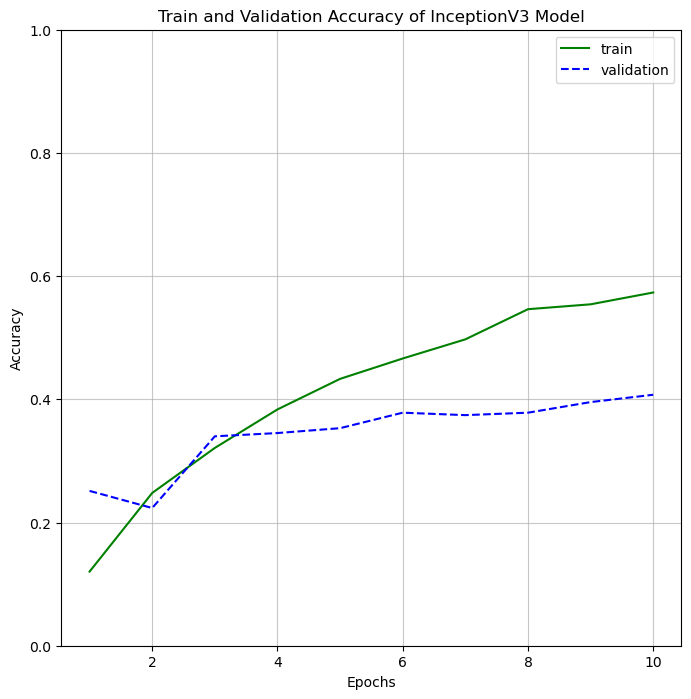

In [31]:
plot_accuracy(epoch_inceptionv3, result_inceptionv3.history, 'InceptionV3')

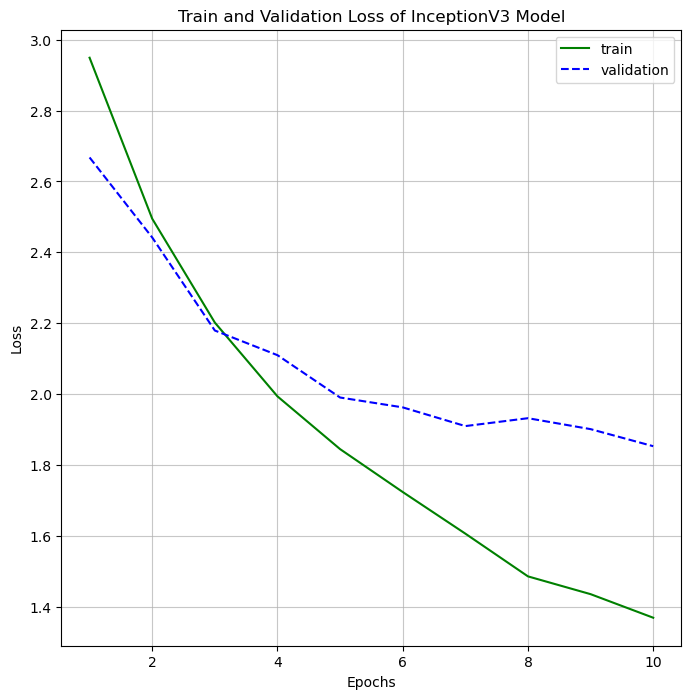

In [32]:
plot_loss(epoch_inceptionv3, result_inceptionv3.history, 'InceptionV3')

1/1 [==============================] - 1s 1s/step


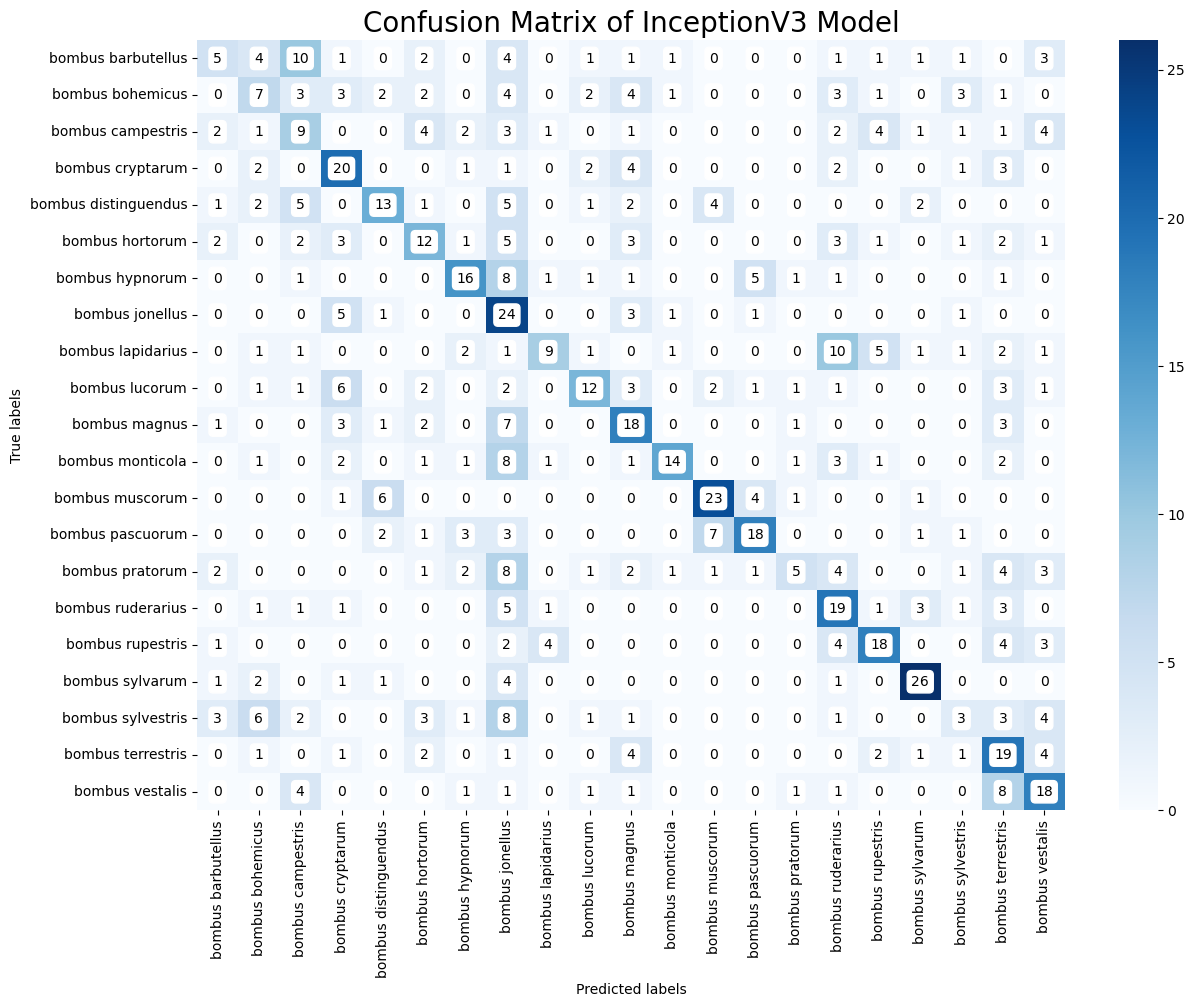

In [37]:
plot_confusion_matrix(model_inceptionv3, validate_batches_incep, 'InceptionV3')

1/1 [==============================] - 0s 364ms/step


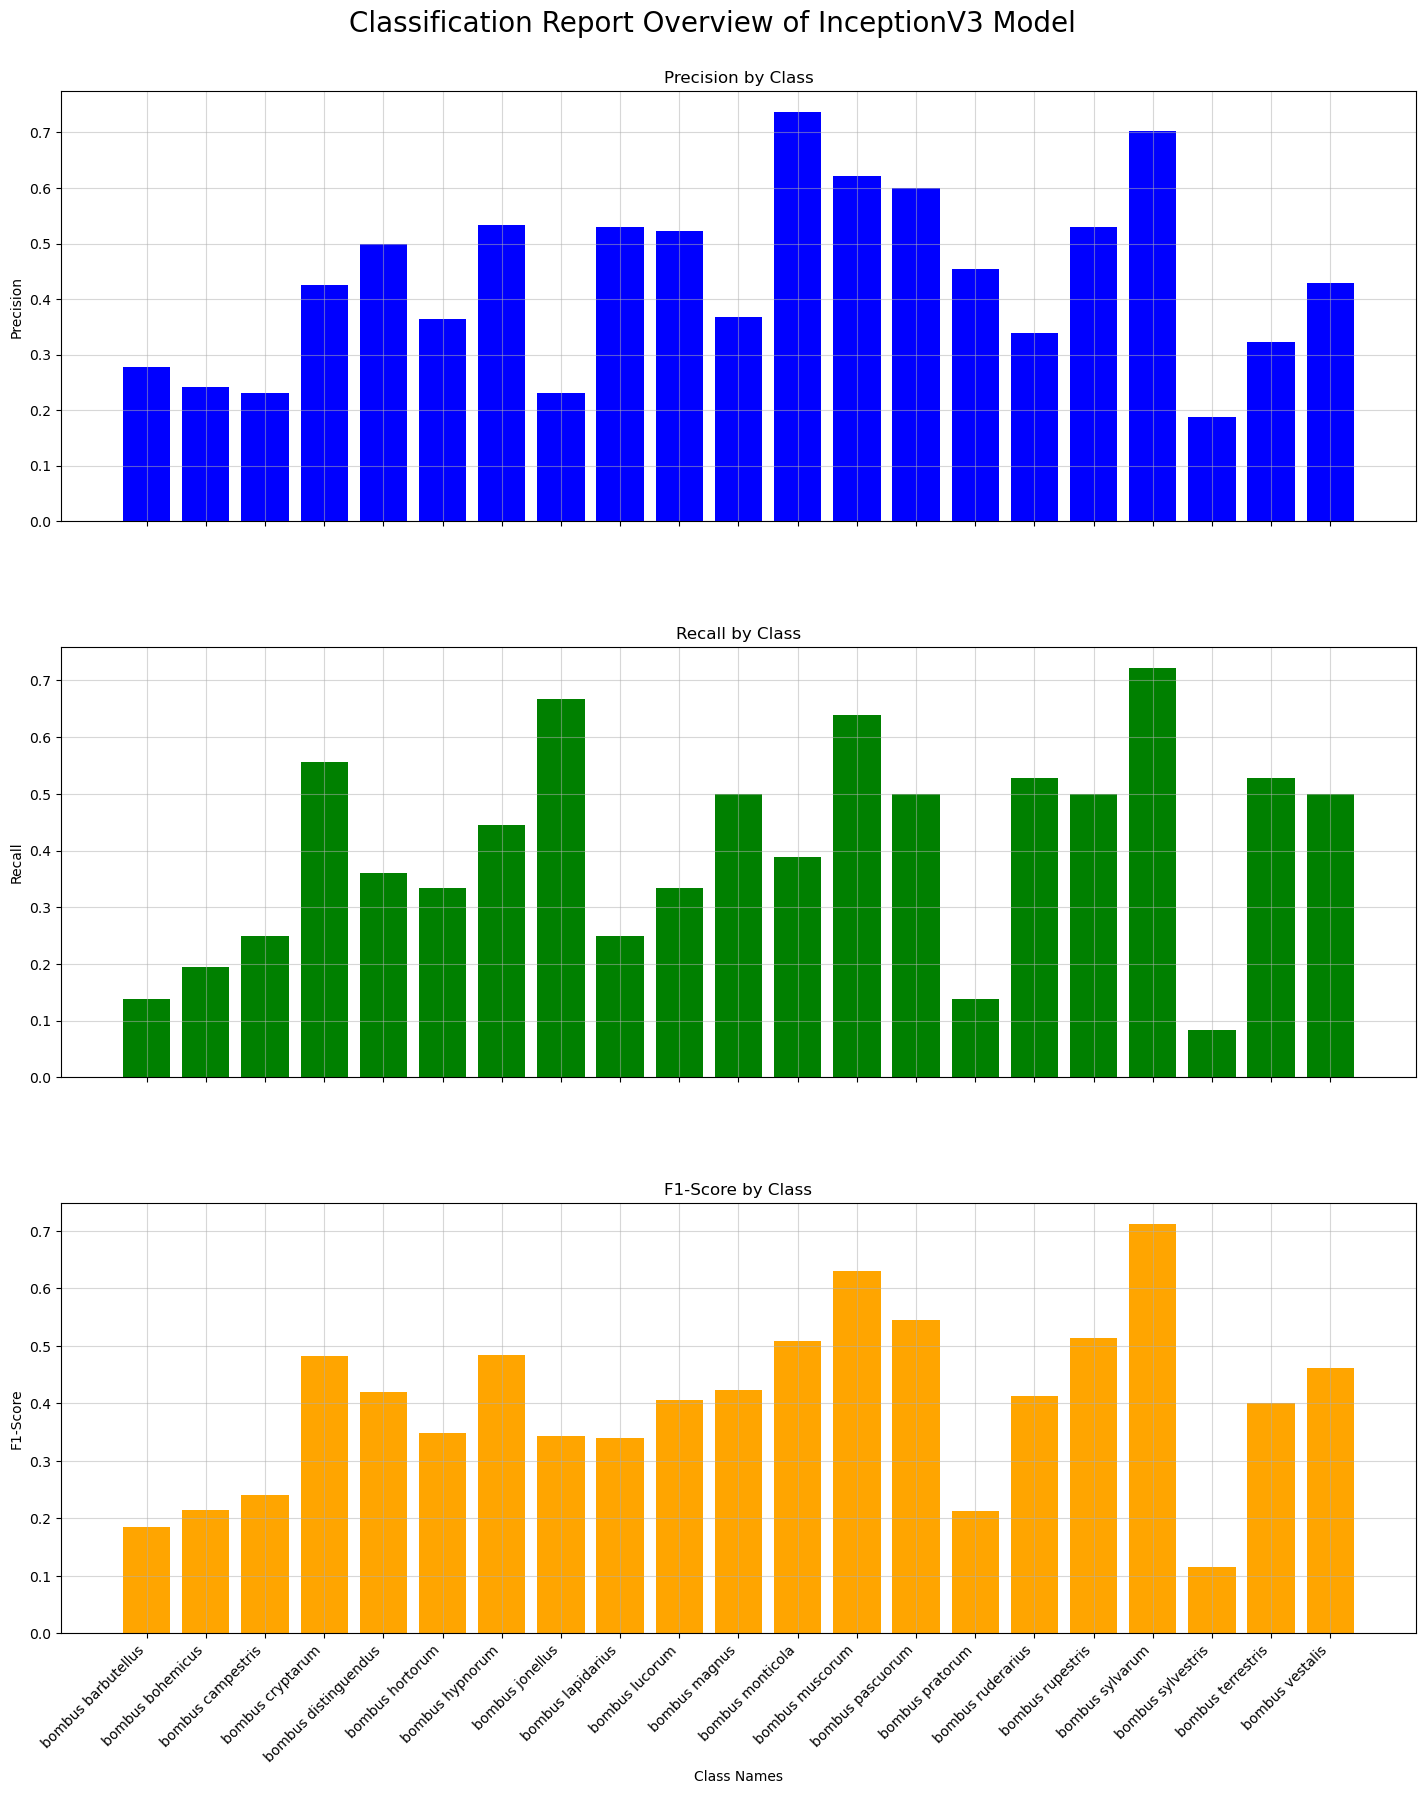

In [39]:
plot_classification_report(model_inceptionv3, validate_batches_incep, 'InceptionV3')

In [41]:
print_classification_report(model_inceptionv3, validate_batches_incep)

1/1 [==============================] - 0s 348ms/step
Classification Report:
                       precision    recall  f1-score   support

  bombus barbutellus       0.28      0.14      0.19        36
    bombus bohemicus       0.24      0.19      0.22        36
   bombus campestris       0.23      0.25      0.24        36
    bombus cryptarum       0.43      0.56      0.48        36
bombus distinguendus       0.50      0.36      0.42        36
     bombus hortorum       0.36      0.33      0.35        36
     bombus hypnorum       0.53      0.44      0.48        36
     bombus jonellus       0.23      0.67      0.34        36
   bombus lapidarius       0.53      0.25      0.34        36
      bombus lucorum       0.52      0.33      0.41        36
       bombus magnus       0.37      0.50      0.42        36
    bombus monticola       0.74      0.39      0.51        36
     bombus muscorum       0.62      0.64      0.63        36
    bombus pascuorum       0.60      0.50      0.55   

1/1 [==============================] - 0s 352ms/step


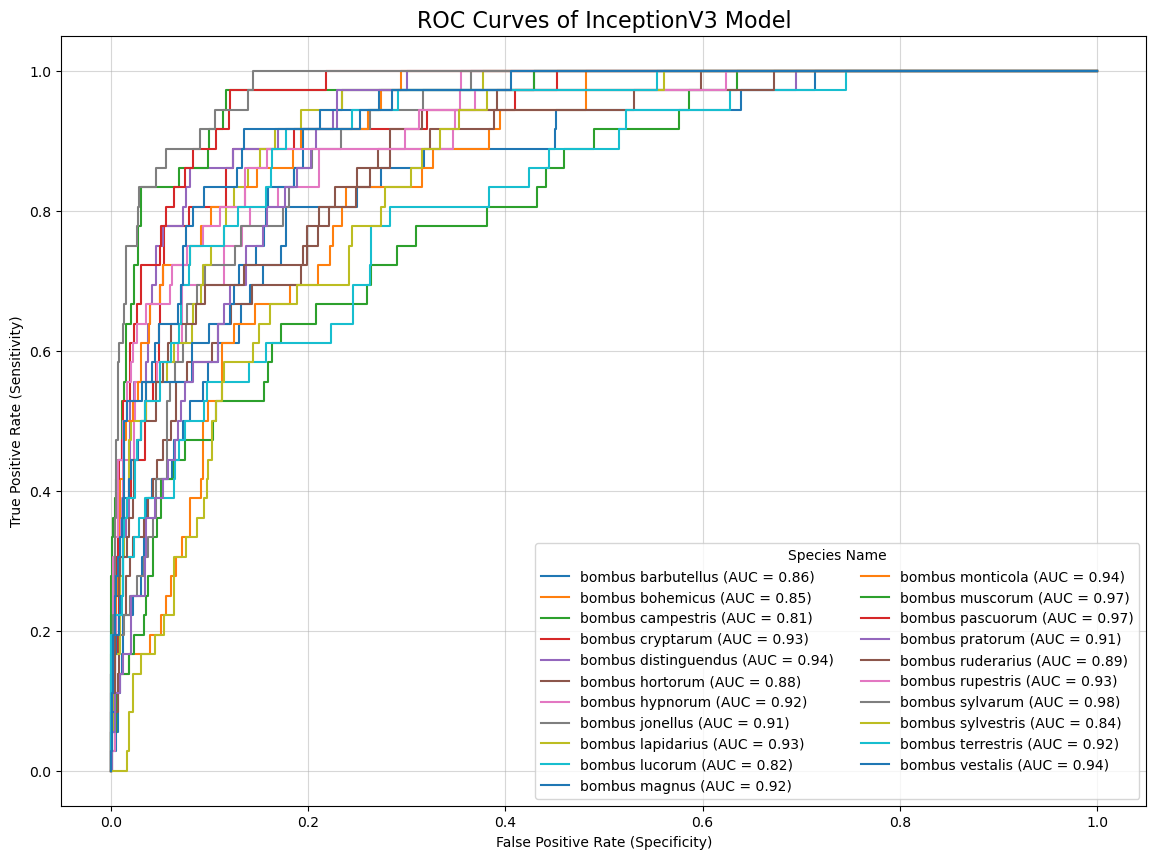

In [48]:
plot_roc_curves(model_inceptionv3, validate_batches_incep, 'InceptionV3')

In [49]:
inceptionv3 = tf.keras.applications.InceptionV3(
    include_top=False,
    input_shape=(299, 299, 3),
    classes=21,
    pooling='avg',
    weights='imagenet')

for layer in inceptionv3.layers:
        layer.trainable=False

In [50]:
model_inceptionv3 = Sequential()

model_inceptionv3.add(inceptionv3)
model_inceptionv3.add(Flatten())
model_inceptionv3.add(Dense(512, activation='relu'))
model_inceptionv3.add(Dropout(0.2))
model_inceptionv3.add(Dense(21, activation='softmax'))

In [51]:
model_inceptionv3.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [52]:
model_inceptionv3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 21)                10773     
                                                                 
Total params: 22862645 (87.21 MB)
Trainable params: 1059861 (4.04 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
epoch_inceptionv3 = 10

result_inceptionv3 = model_inceptionv3.fit(train_batches_incep,
                                           validation_data=validate_batches_incep,
                                           epochs=epoch_inceptionv3,
                                           verbose=2)

Epoch 1/10
